## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
#Create a path to where the data is stored.
path = r'/Users/vicky/OneDrive/文件/careerfoundry/Machine Learning with Python/Datasets'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path,'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
#Read in the pleasant weather data.
answer = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
answer

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Reduce to just the mean temperatures and remove 3 non-pertinent columns (GDANSK, ROMA & TOURS)
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [7]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5
1,19600102,1,6.1,2.9,2.3,7.7,8.2,6.1,7.7,2.1,8.6,9.8,6.2,3.4,-9.5,4.0,8.9
2,19600103,1,8.5,3.1,2.7,6.8,7.1,8.4,6.5,4.6,6.9,8.6,5.8,1.9,-9.5,2.4,10.5
3,19600104,1,6.3,2.0,2.0,6.7,6.8,9.4,5.8,3.2,7.0,10.3,3.9,3.0,-11.5,1.2,7.4
4,19600105,1,3.0,2.0,2.5,8.0,7.7,8.9,5.4,3.6,8.1,12.1,1.8,3.7,-9.3,3.3,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,18.2,11.7,15.7,17.8,16.4,9.1,14.7,18.6,20.0,14.3,9.7,0.6,11.5,10.7
22946,20221028,10,16.7,15.9,11.7,16.0,19.4,15.8,9.1,12.9,18.9,19.1,16.1,10.9,2.3,12.5,10.7
22947,20221029,10,16.7,13.4,11.7,15.8,18.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,3.3,13.1,10.7
22948,20221030,10,15.4,15.0,11.7,14.4,16.7,15.2,9.1,14.0,16.3,15.7,14.5,5.9,3.4,7.5,10.7


In [8]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = answer.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


## 2. Scaling data

In [12]:
X_train[:10]

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
8196,20.4,22.5,22.5,16.3,18.8,15.8,17.1,19.2,17.7,24.8,19.1,10.5,2.3,8.5,15.6
20472,-1.8,-3.6,-3.3,-2.5,-3.6,1.3,9.1,-4.4,-3.8,5.8,-4.8,-11.2,-17.4,-6.9,10.7
18269,-1.8,3.2,-0.4,-4.9,-5.4,-2.8,-6.2,0.6,-6.1,2.1,-2.4,-14.4,-14.1,-8.3,1.0
7713,-1.4,0.7,1.5,0.2,-0.7,2.4,-2.9,-0.4,-1.0,2.3,-4.2,-6.5,-20.9,-2.2,6.8
21958,6.1,6.7,6.2,5.7,5.0,7.2,9.1,6.6,5.9,11.0,5.2,0.6,-14.7,1.0,10.7
11464,18.3,18.7,18.7,12.1,13.6,16.6,13.4,19.1,13.9,18.8,18.3,11.4,-2.6,10.0,13.1
3984,3.7,4.4,4.7,5.2,6.9,10.4,2.8,1.4,7.0,13.2,-2.0,-2.1,-2.6,1.1,10.9
4752,-3.9,0.5,2.1,2.3,2.3,8.8,0.0,0.8,3.2,6.5,-2.1,-0.4,-10.3,1.3,10.5
11092,15.7,21.3,20.6,13.5,16.0,17.3,13.8,18.3,14.8,19.2,14.5,12.8,-0.7,11.9,12.6
21377,18.8,23.6,21.6,19.0,20.4,19.4,9.1,19.6,20.3,26.8,18.2,21.5,4.4,20.0,10.7


In [13]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [14]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

## 3. Create the ANN

In [15]:
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [16]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.43481292121775506
0.4414430115022656


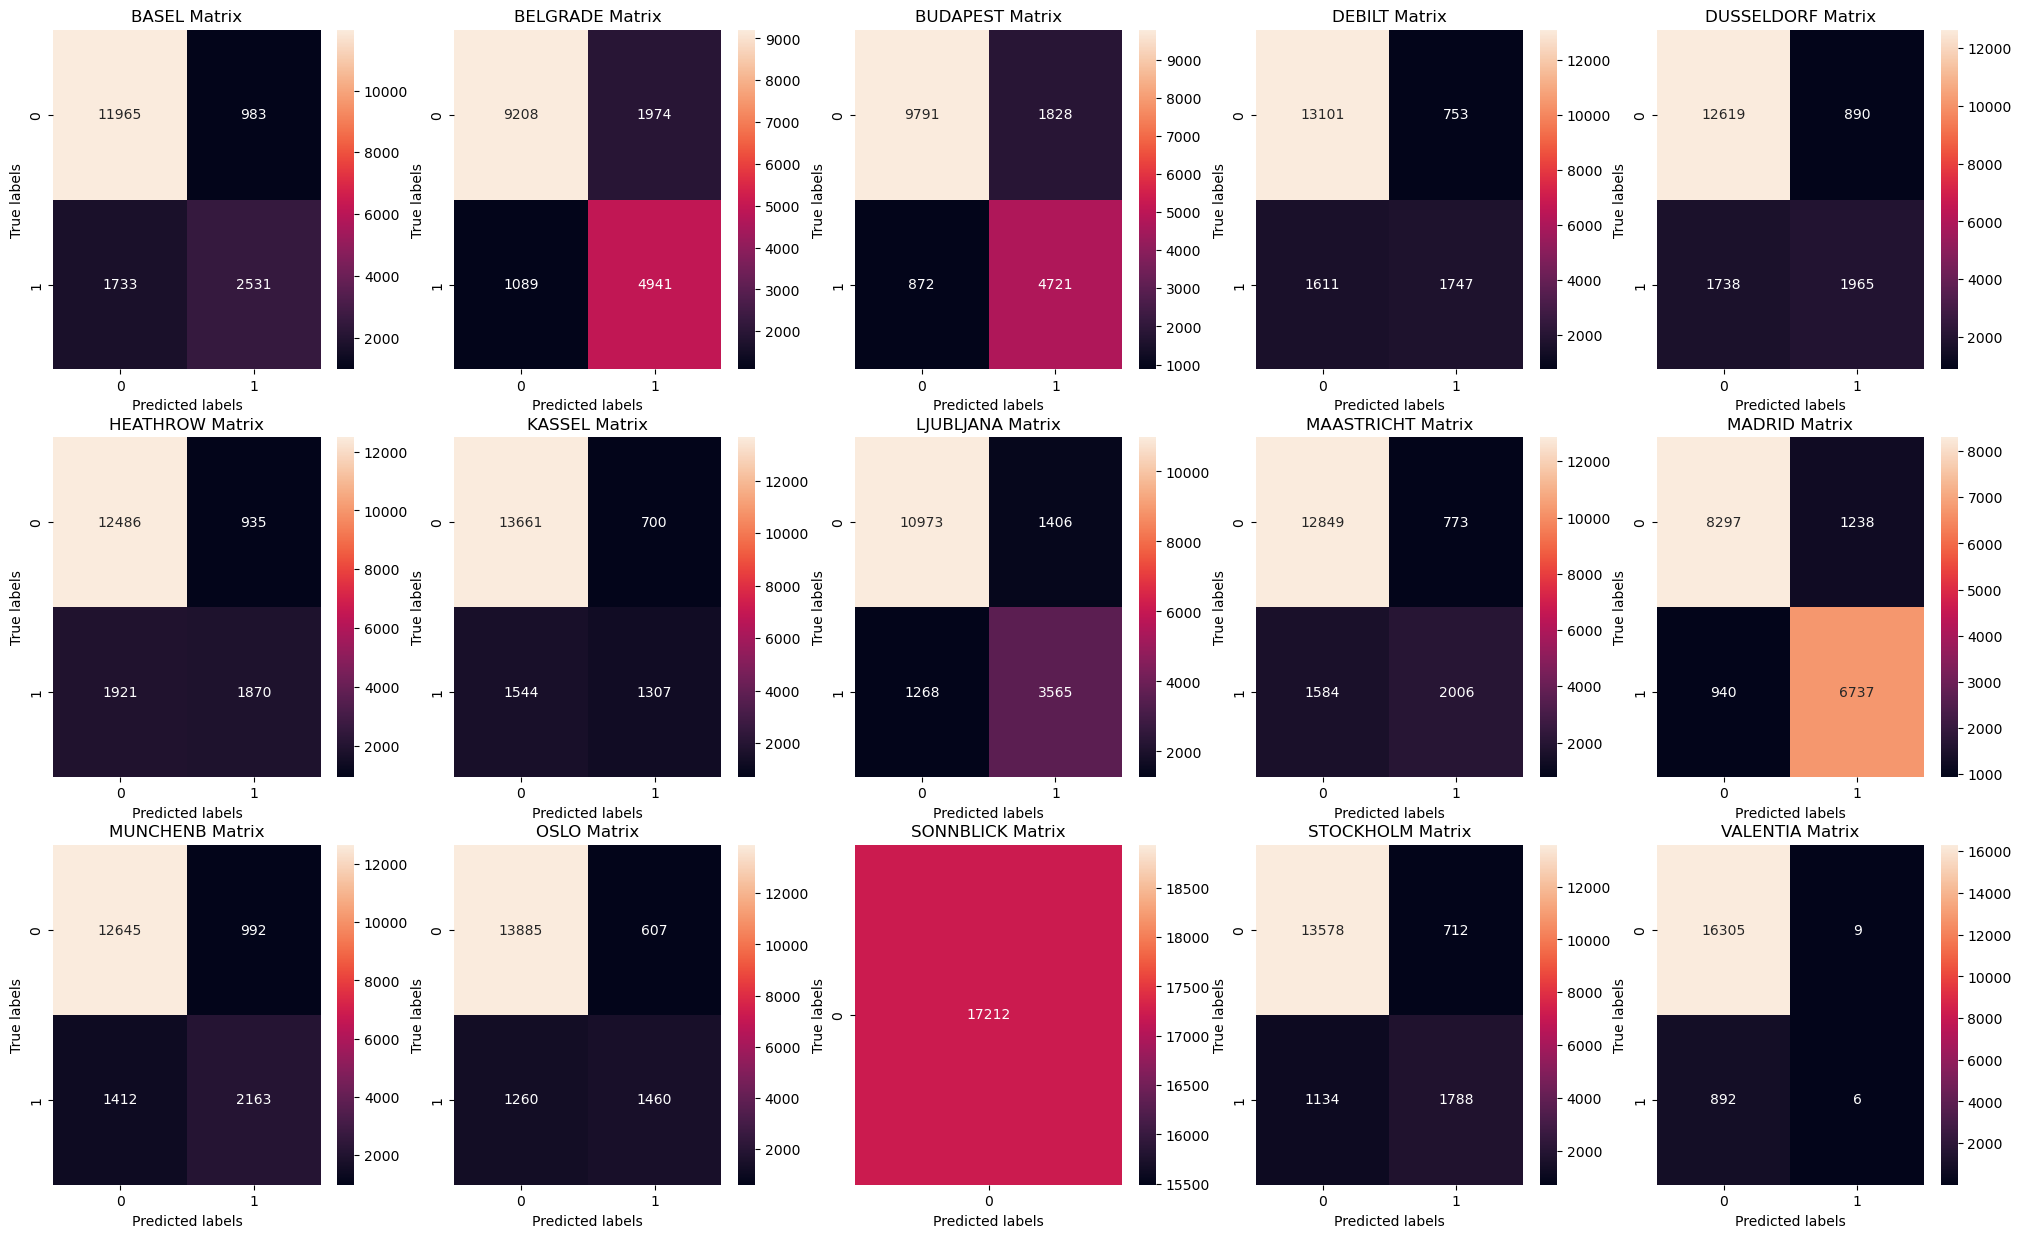

In [17]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

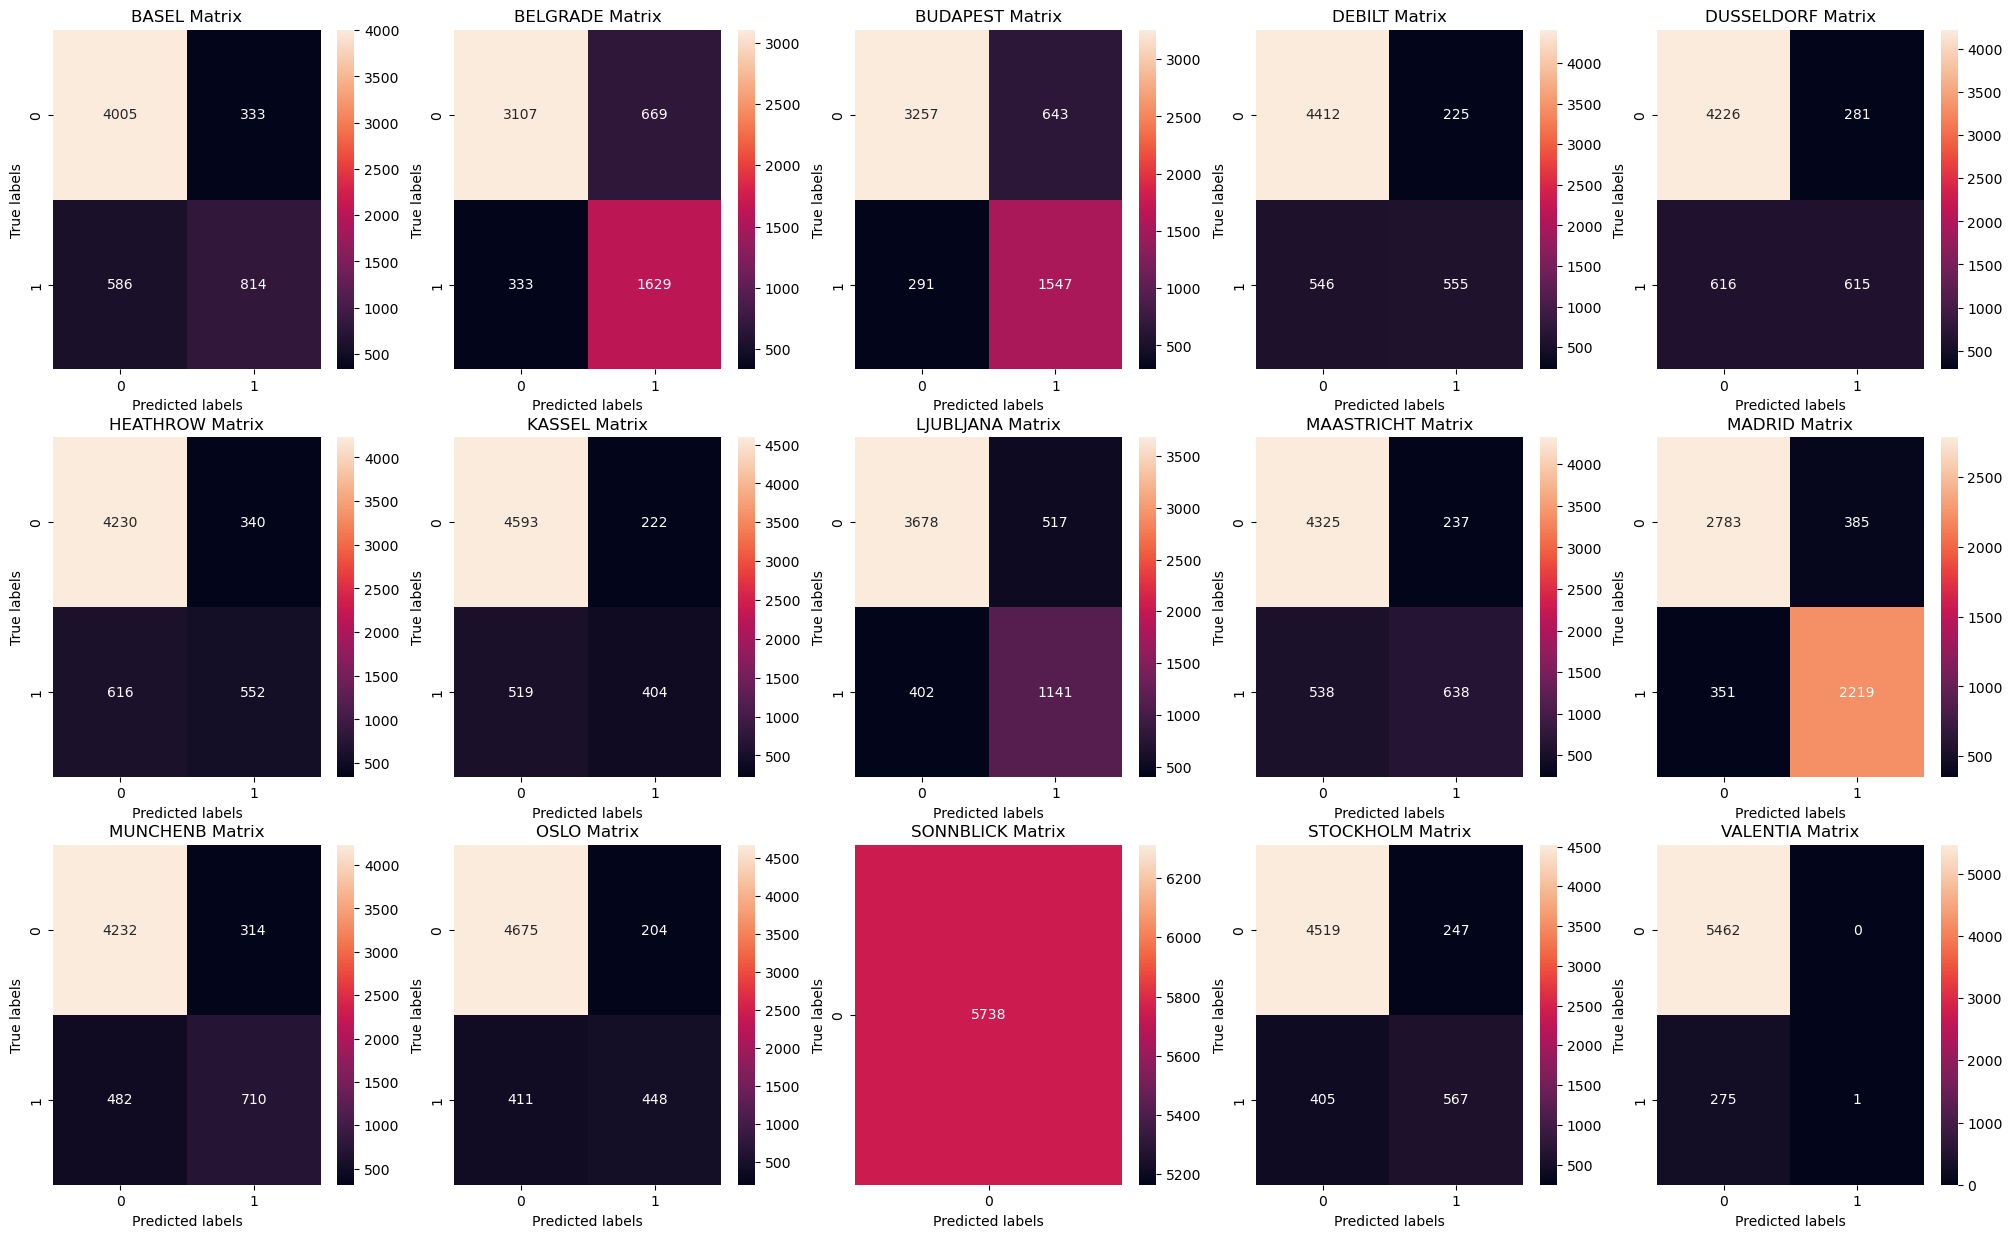

In [18]:
# Confusion matrix based on the last "k" in the sequence (Test data)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [19]:
history = mlp.loss_curve_

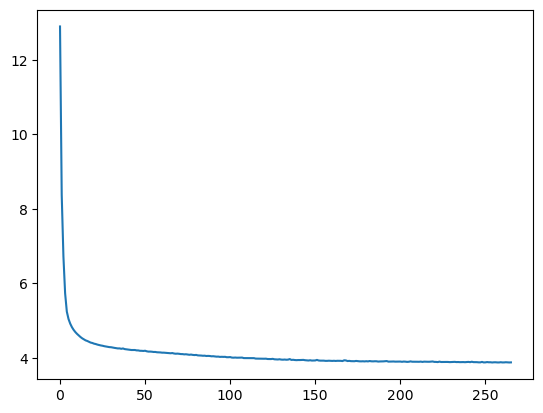

In [20]:
plt.plot(history)

## 4. try a more complicated ANN network 

In [25]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(200,100, 200), max_iter=1000, tol=0.0001) #increasing hidden layers
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 200), max_iter=1000)

In [26]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.5864513130374157
0.4334262809341234


array([[[3899,  439],
        [ 438,  962]],

       [[3196,  580],
        [ 409, 1553]],

       [[3423,  477],
        [ 370, 1468]],

       [[4303,  334],
        [ 456,  645]],

       [[4139,  368],
        [ 527,  704]],

       [[4215,  355],
        [ 531,  637]],

       [[4546,  269],
        [ 341,  582]],

       [[3749,  446],
        [ 393, 1150]],

       [[4223,  339],
        [ 433,  743]],

       [[2697,  471],
        [ 289, 2281]],

       [[4141,  405],
        [ 413,  779]],

       [[4612,  267],
        [ 332,  527]],

       [[5738,    0],
        [   0,    0]],

       [[4516,  250],
        [ 377,  595]],

       [[5376,   86],
        [ 212,   64]]], dtype=int64)

In [27]:
# based on the accuracy result the model is overfitting, as indicated by the higher accuracy on the training data compared to the test data. 

## 5. try another ANNs network

In [36]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(80,80), max_iter=500, tol=0.0001) #increasing hidden layers
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(80, 80), max_iter=500)

In [37]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.4680455496165466
0.4567793656326246


array([[[4067,  271],
        [ 541,  859]],

       [[3273,  503],
        [ 387, 1575]],

       [[3438,  462],
        [ 317, 1521]],

       [[4422,  215],
        [ 481,  620]],

       [[4132,  375],
        [ 461,  770]],

       [[4230,  340],
        [ 504,  664]],

       [[4647,  168],
        [ 410,  513]],

       [[3848,  347],
        [ 424, 1119]],

       [[4304,  258],
        [ 458,  718]],

       [[2791,  377],
        [ 263, 2307]],

       [[4365,  181],
        [ 535,  657]],

       [[4666,  213],
        [ 321,  538]],

       [[5738,    0],
        [   0,    0]],

       [[4512,  254],
        [ 312,  660]],

       [[5431,   31],
        [ 238,   38]]], dtype=int64)

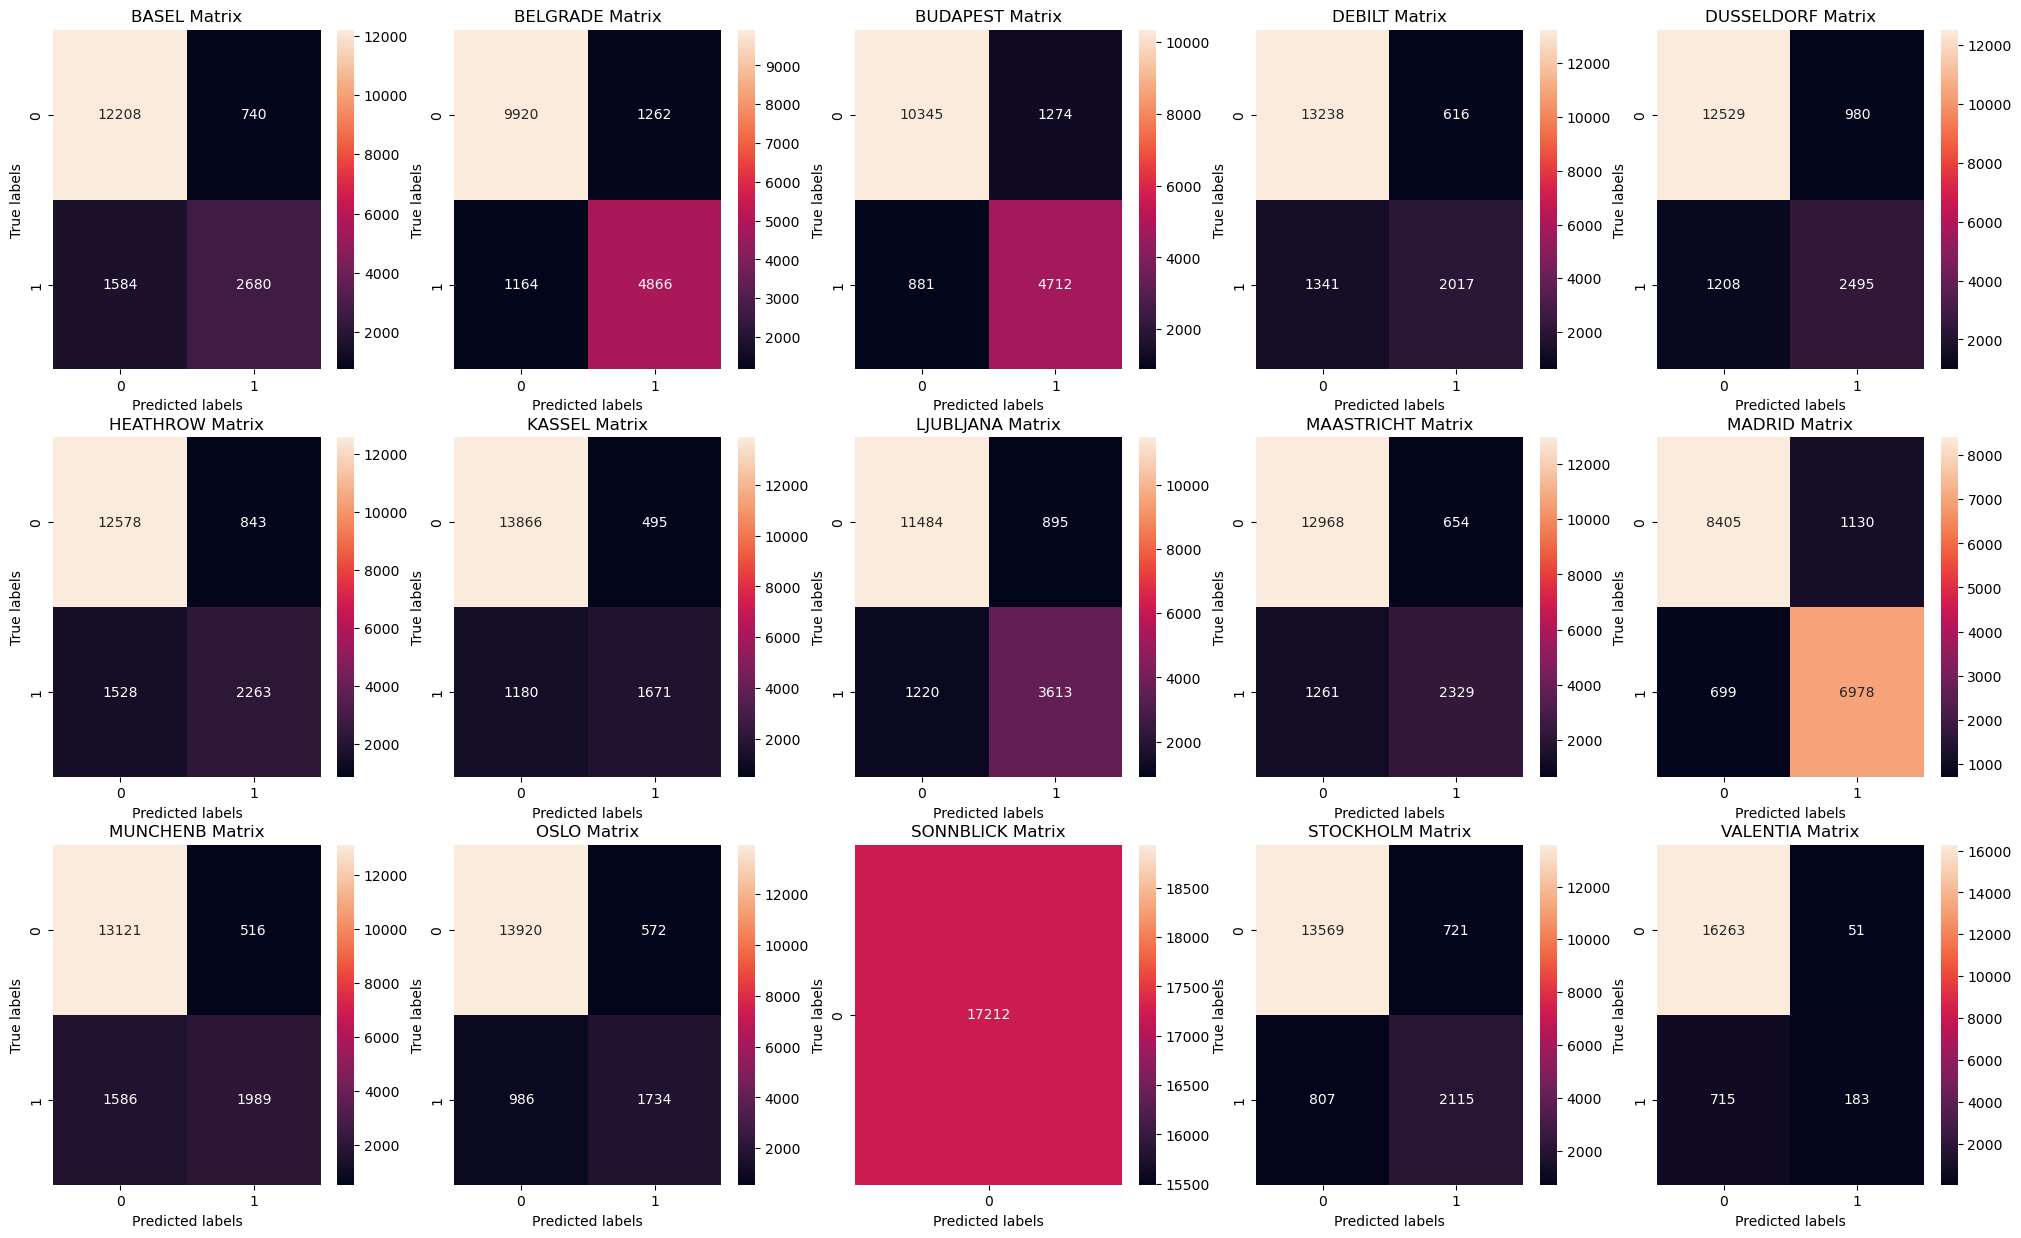

In [38]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

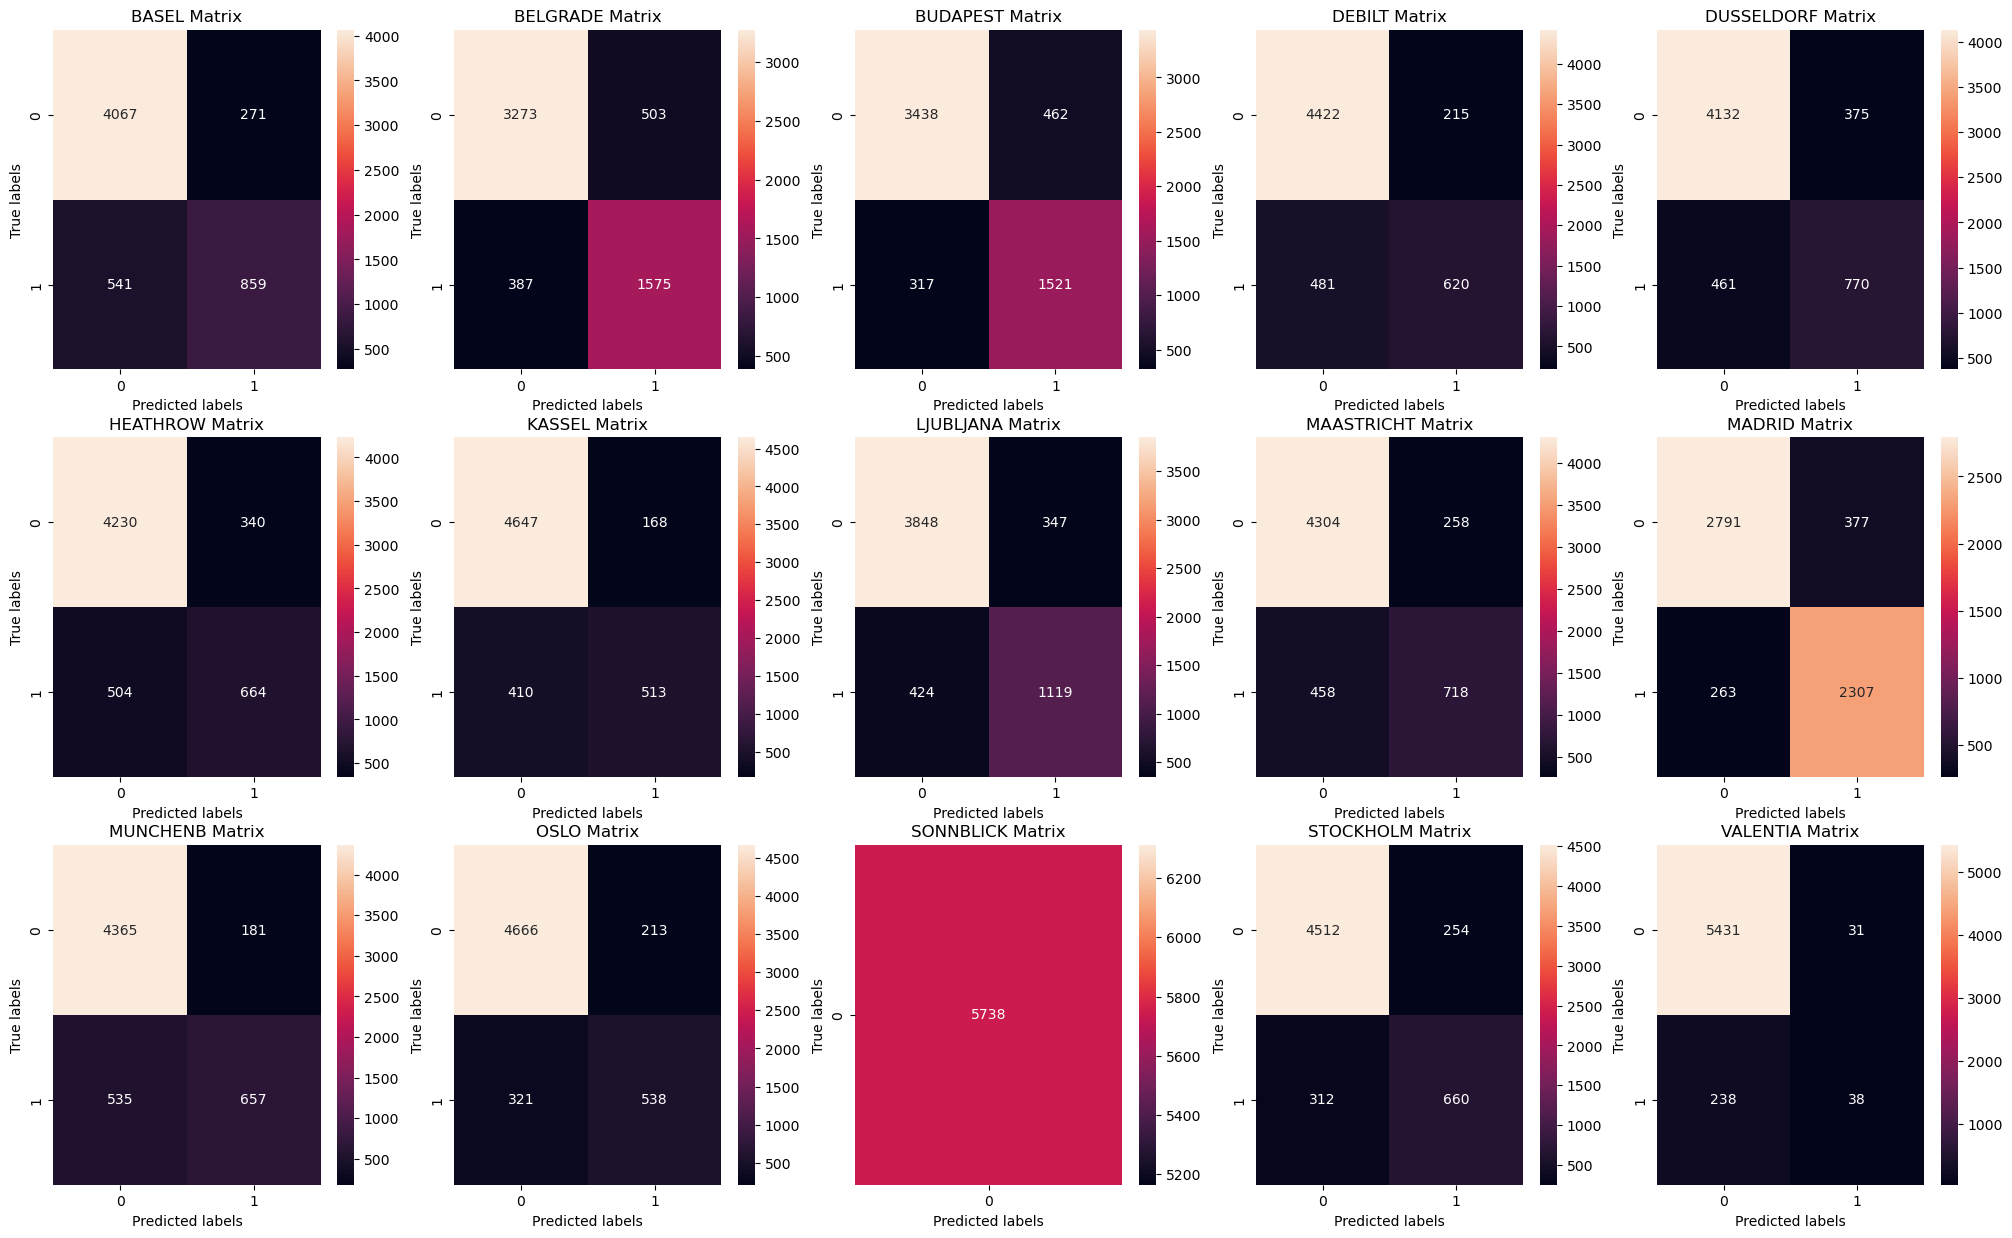

In [39]:
# Confusion matrix based on the last "k" in the sequence (Test data)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [40]:
history = mlp.loss_curve_

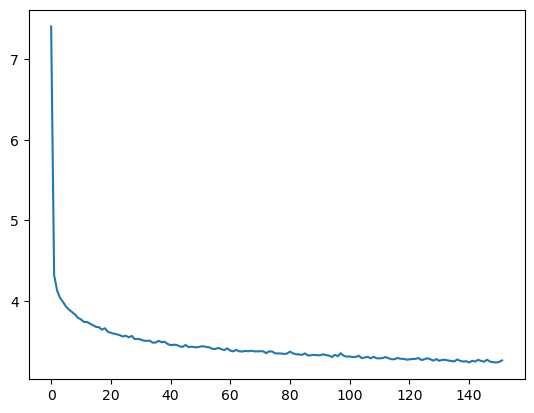

In [41]:
plt.plot(history)